# Спектральный анализ

In [7]:
%matplotlib inline

import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import scipy.fftpack as fft
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt

default_dpi = mpl.rcParamsDefault['figure.dpi']
factor = 1.5
mpl.rcParams['figure.dpi'] = default_dpi * factor

## Исходные данные

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


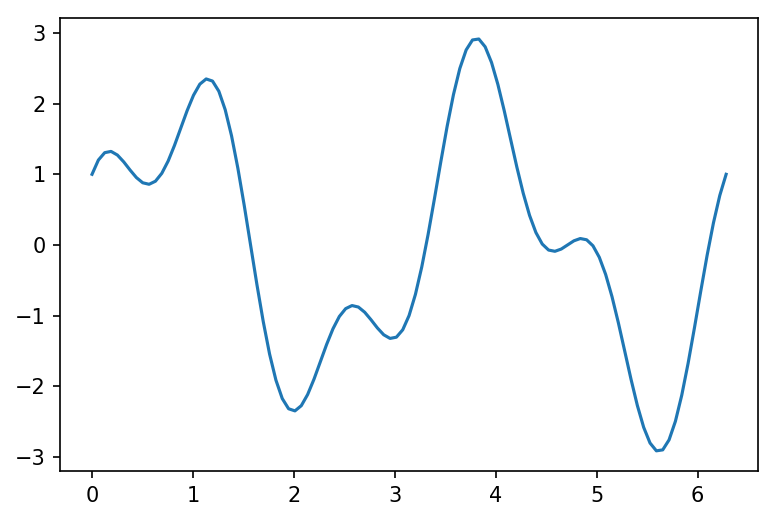

In [8]:
x = np.linspace(0, np.pi * 2, 101)
y = 0. + 2.*np.sin(x * 2) + np.cos(x * 5 ) #+ np.sin(x * 25.5)

#x = np.linspace(-10, 10, 101)
#y = 5*np.exp(-10*x**2) * 0.

#y[x>-1.]=1
#y[x>1.]=0

print (x/(np.pi * 2))

plt.plot(x, y)

## Прямое и обратное ДПФ

6.66133814775094e-17


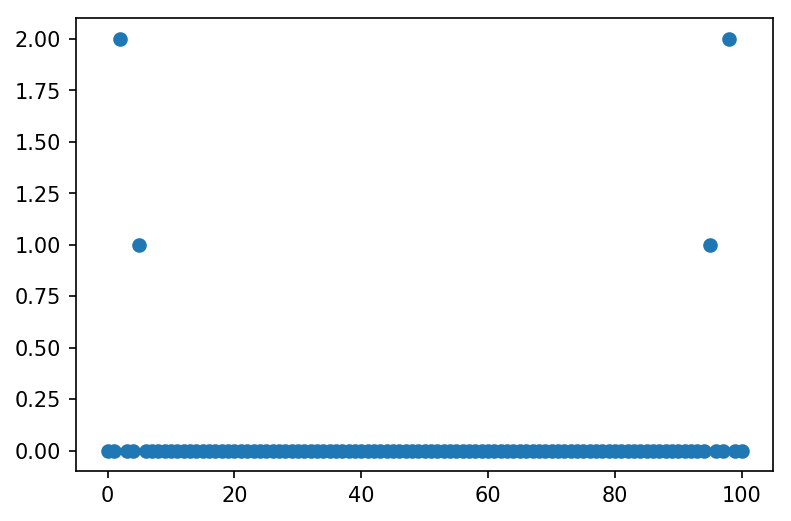

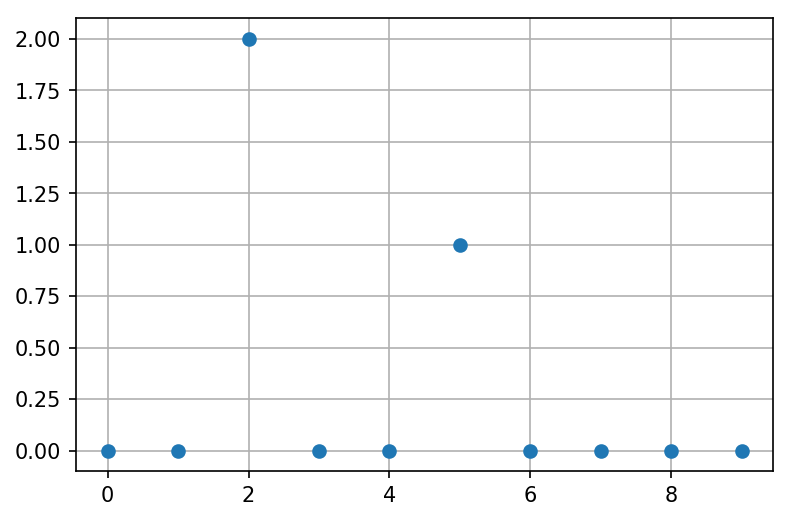

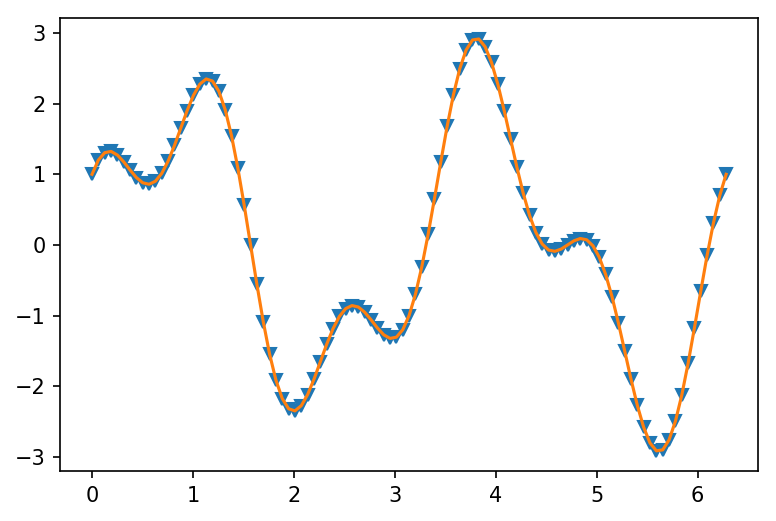

In [9]:
L = max(x) - min(x)
a = np.zeros ((len(x)))
b = np.zeros ((len(x)))
A = np.zeros ((len(x)))

CosTerm = np.zeros ((len(x)))
SinTerm = np.zeros ((len(x)))

n = len(x)

dx = L / (n-1)

# --------------------------------------------------------------------------------------
#                                                                 Прямое преобразование
# --------------------------------------------------------------------------------------

a[0] = 1./L * np.sum (y [:(n-1)]) * dx
b[0] = 0.

print (a[0])

for k in range (1, n-1):
    
    CosTerm = np.cos(2.* np.pi * k * x / L) * dx
    SinTerm =  np.sin(2.* np.pi * k * x / L) * dx
    
    a[k]  = 2./L * np.sum (y[:(n-1)]*CosTerm [:(n-1)])
    b[k]  = 2./L * np.sum (y[:(n-1)]*SinTerm [:(n-1)])
           
    A = (a**2+b**2)**(0.5)
    
    #print (a[k], b[k])
    
#print (A)
#print(A[A>1.E-6])

plt.plot (A[0:n], 'o')
plt.figure ()
plt.grid ()
plt.plot (A[0:10], 'o')

# --------------------------------------------------------------------------------------
#                                                                Обратное преобразование
# --------------------------------------------------------------------------------------

m = int(n/2)

yf = np.zeros (n)

for k in range (0, m):
    
    yf += a[k]*np.cos(2.* np.pi * k * x / L) + b[k]*np.sin(2.* np.pi * k * x / L)
    
plt.figure ()
plt.plot (x,y, 'v')
plt.plot (x,yf)

## Быстрое ДПФ (FFT)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


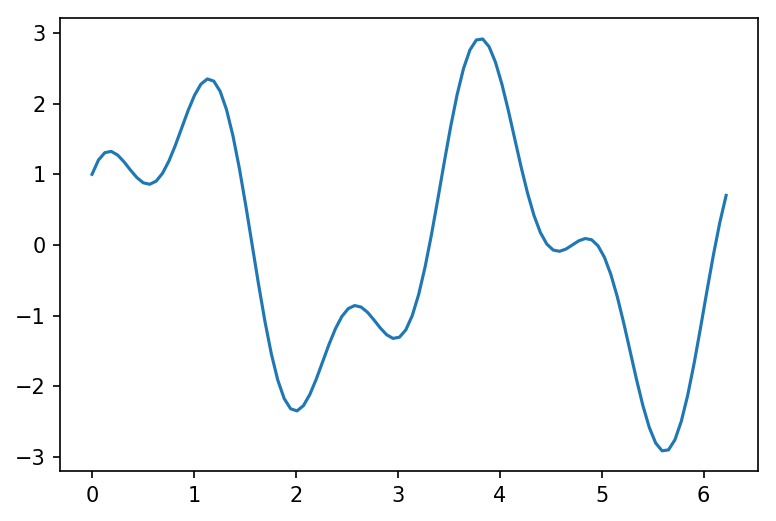

In [10]:
x = np.linspace(0, np.pi * 2, 100, endpoint=False)
y = 0. + 2.*np.sin(x * 2) + np.cos(x * 5 ) #+ np.sin(x * 25.5)

print (x/(np.pi * 2))

plt.plot(x, y)

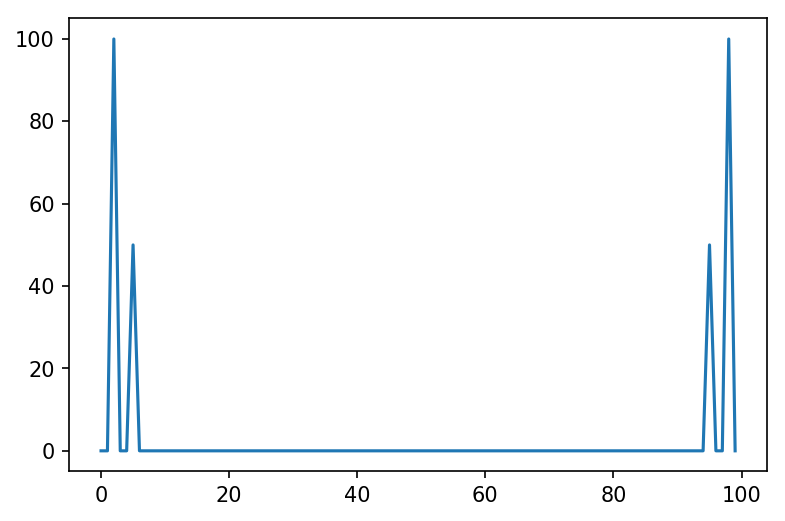

In [11]:
# --------------------------------------------------------------------------------------
#                                                                             Прямое FFT
# --------------------------------------------------------------------------------------

y_fft = fft.fft(y)

plt.plot(np.abs(y_fft))

C:\Users\Asus\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


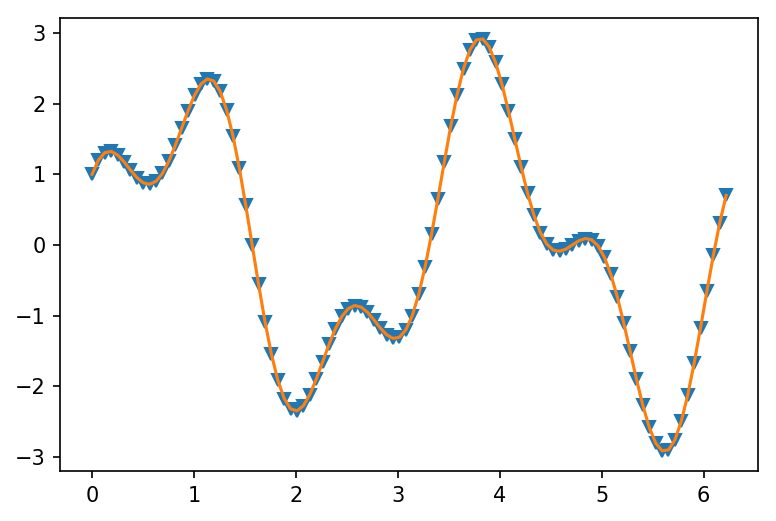

In [12]:
# --------------------------------------------------------------------------------------
#                                                                           Обратное FFT
# --------------------------------------------------------------------------------------
from scipy.fftpack import ifft
yf = ifft(y_fft )
plt.plot (x,y,'v')
plt.plot (x,yf)

## Зашумленные данные

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1
 1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38
 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66
 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94
 1.96 1.98 2.  ]


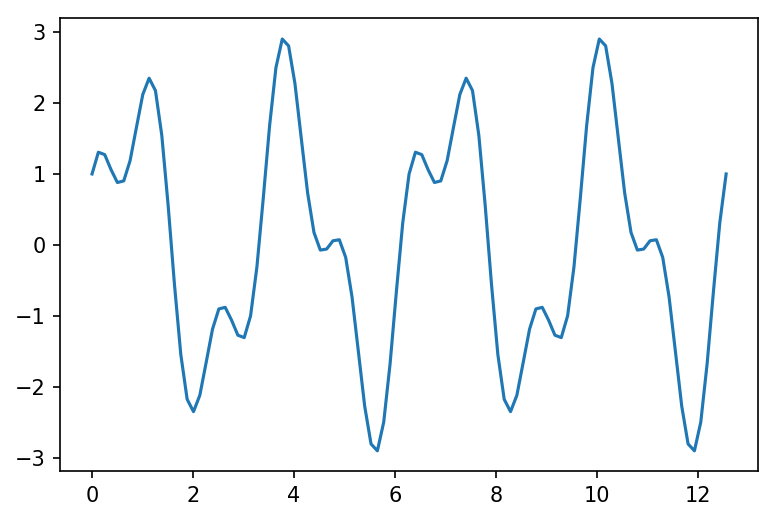

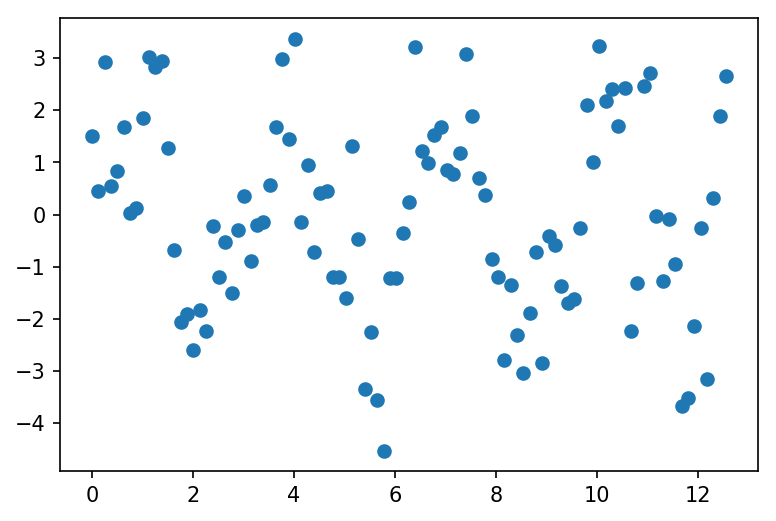

In [20]:
x = np.linspace(0, np.pi * 4, 101)
y = 0. + 2.*np.sin(x * 2) + np.cos(x * 5 ) #+ np.sin(x * 25.5)

#x = np.linspace(-10, 10, 101)
#y = 5*np.exp(-10*x**2) * 0.

#y[x>-1.]=1
#y[x>1.]=0

print (x/(np.pi * 2))

yd = np.zeros(len(x))

plt.plot(x, y)
Delta = 1.0 * np.random.randn(len(x))
yd = y + Delta
y_av = np.sum(y)/len(x)

plt.figure ()

plt.plot (x, yd, 'o')

-0.05887735983256766


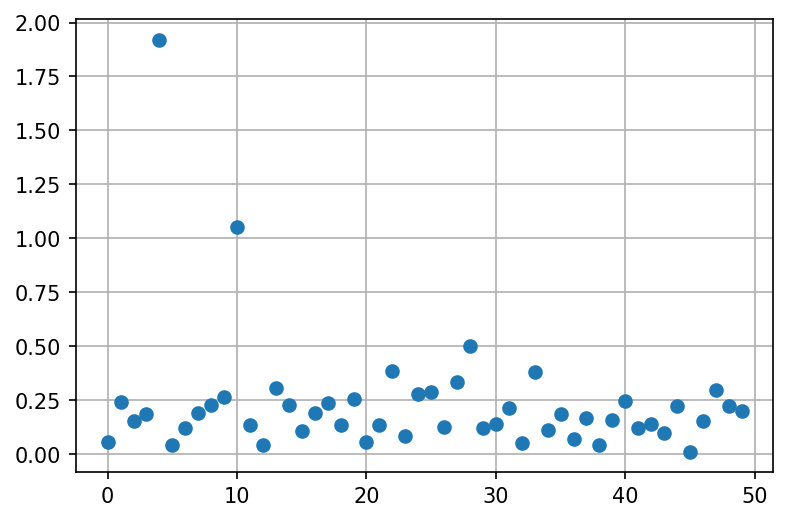

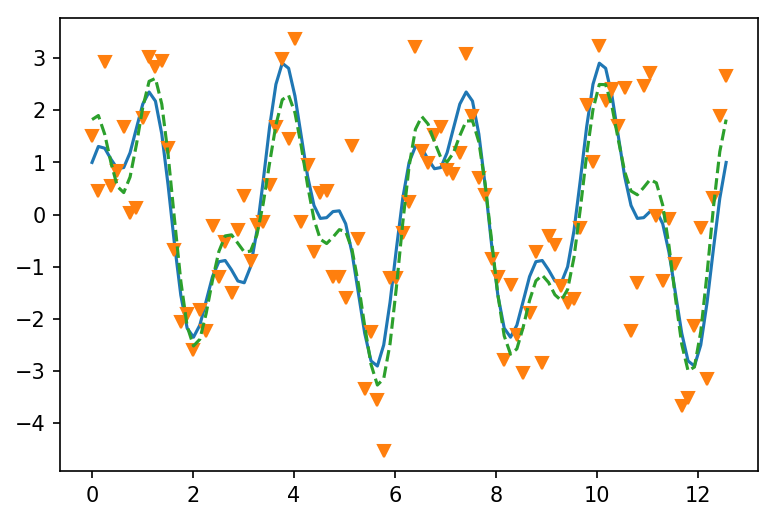

In [29]:
L = max(x) - min(x)
a = np.zeros ((len(x)))
b = np.zeros ((len(x)))
A = np.zeros ((len(x)))

CosTerm = np.zeros ((len(x)))
SinTerm = np.zeros ((len(x)))

n = len(x)

dx = L / (n-1)

# --------------------------------------------------------------------------------------
#                                                                 Прямое преобразование
# --------------------------------------------------------------------------------------

a[0] = 1./L * np.sum (yd [:(n-1)]) * dx
b[0] = 0.

print (a[0])

for k in range (1, n-1):
    
    CosTerm = np.cos(2.* np.pi * k * x / L) * dx
    SinTerm =  np.sin(2.* np.pi * k * x / L) * dx
    
    a[k]  = 2./L * np.sum (yd[:(n-1)]*CosTerm [:(n-1)])
    b[k]  = 2./L * np.sum (yd[:(n-1)]*SinTerm [:(n-1)])
           
    A = (a**2+b**2)**(0.5)
    
    #print (a[k], b[k])
    
#print (A)
#print(A[A>1.E-6])

plt.grid ()
plt.plot (A[0:int(n/2)], 'o')

# --------------------------------------------------------------------------------------
#                                                                Обратное преобразование
# --------------------------------------------------------------------------------------

m = int(n/2)

yf = np.zeros (n)

for k in range (0, int(m/4)):
    
    yf += a[k]*np.cos(2.* np.pi * k * x / L) + b[k]*np.sin(2.* np.pi * k * x / L)
    
plt.figure ()
plt.plot (x, y,)
plt.plot (x, yd, 'v')
plt.plot (x,yf, '--')